# Homework 5- Extra credit

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import time
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import metrics, svm
from sklearn.linear_model import LinearRegression, Perceptron,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, mean_absolute_error
from sklearn import preprocessing
import matplotlib as mpl
from sklearn.linear_model import Perceptron
from sklearn.mixture import GaussianMixture
mpl.rcParams['figure.dpi']= 100

# VLF Signal Detection with PCA

In [2]:
input_df = pd.read_csv('Signal_input_data.csv', header=None)
class_labs = pd.read_csv('Signal_class_data.csv', header=None)

# df_ip.head()
# class_labs.head()

# scaling data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(input_df)

# input_df = scaler.transform(input_df)

# train_test split
X_train, X_test, y_train, y_test = train_test_split(input_df, class_labs, 
                                                    train_size = 0.8, 
                                                    test_size = 0.2)

## Perceptron classifier

Accuracy of perceptron classifier : 100.0000%


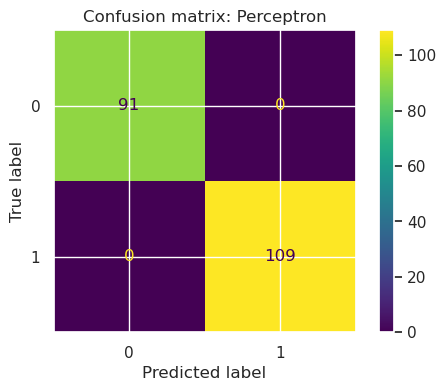

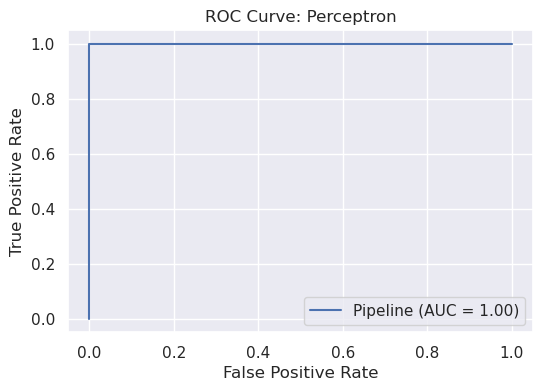

In [3]:
# Perceptron
def perceptron(X_train, X_test, y_train, y_test):
    pipe = make_pipeline(Perceptron(tol=1e-3, random_state=0))
    pt_clf_model = pipe.fit(X_train, y_train.values.ravel())

    cm = plot_confusion_matrix(pt_clf_model, X_test, y_test)
    cm.ax_.set_title("Confusion matrix: Perceptron")
    roc = metrics.plot_roc_curve(pt_clf_model, X_test, y_test)
    roc.ax_.set_title("ROC Curve: Perceptron")

    print("Accuracy of perceptron classifier : {:.4f}%".format(pipe.score(X_test, y_test)*100))

perceptron(X_train, X_test, y_train, y_test)

In [4]:
input_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,11.501392,-26.122529,-21.218090,-16.110638,-23.002128,-18.461505,-21.129859,-11.937987,-26.723534,-26.606462,...,-25.817320,-32.810393,-22.098772,-28.205689,-21.084736,-12.054930,-28.785269,-25.855291,-27.939103,-17.827075
1,11.536099,-24.294981,-21.922384,-27.883720,-23.434532,-20.568432,-24.319788,-16.818585,-26.529303,-33.315948,...,-31.893332,-24.436930,-31.094569,-29.673176,-25.406694,-12.017285,-29.072428,-29.246651,-27.961155,-19.175610
2,11.222568,-24.189668,-18.670385,-19.920933,-18.761855,-16.912900,-11.334817,-19.736499,-17.972989,-15.020202,...,-30.575050,-23.524982,-32.572601,-26.129291,-29.564859,-10.363664,-43.626529,-30.906370,-29.518836,-21.089059
3,10.938072,-28.653824,-17.784440,-22.323169,-23.979340,-15.808900,-11.665744,-14.950360,-15.975830,-20.210790,...,-30.835065,-24.973465,-34.108592,-37.368592,-27.064571,-9.747599,-23.278671,-41.567949,-34.890452,-17.110244
4,10.899772,-25.911313,-31.613147,-21.248580,-19.149354,-17.320972,-16.169730,-24.683370,-13.474133,-21.000964,...,-35.042644,-28.361487,-22.415665,-24.478825,-35.552942,-10.180075,-33.784548,-33.524456,-25.626383,-18.723686


## Perform PCA

Text(0.5, 1.0, 'Sum of the explained variance as a function of PCA')

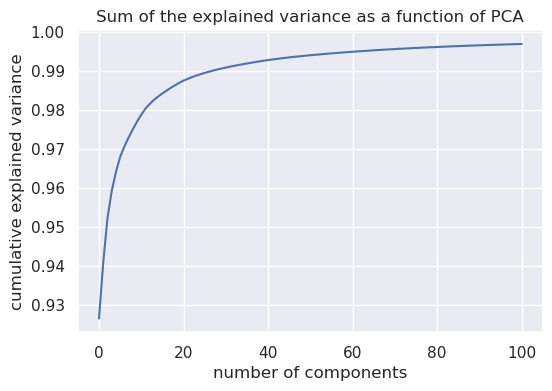

In [29]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 101

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Sum of the explained variance as a function of PCA')

In [49]:
len(list(range(len(x_pca[:,0])))), x_pca[0,:].shape

(4137, (101,))

Text(0.5, 1.0, 'Freuency index vs First PCA component')

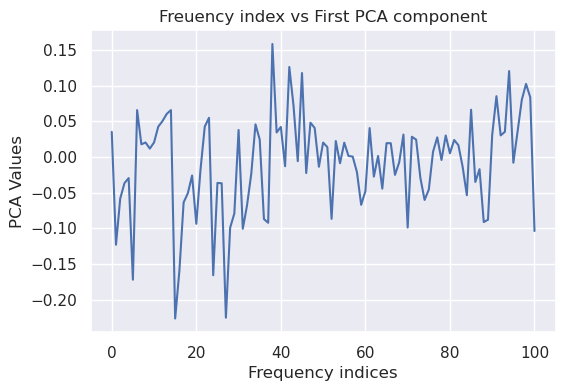

In [56]:
## TODO: Not sure, about this part
# x_pca = pca.transform(X_train)
plt.plot(pca.components_[:,0])
plt.xlabel('Frequency indices')
plt.ylabel('PCA Values');
plt.title('Freuency index vs First PCA component')
# plt.plot(x_pca[0,:])
# plt.scatter(x_pca[0,:], list(range(101)))
# plt.scatter(x_pca[:,0],x_pca[:,1] , c=y_train, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
# plt.colorbar();

Accuracy of perceptron classifier : 100.0000%


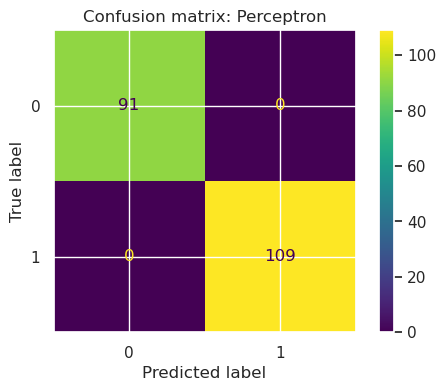

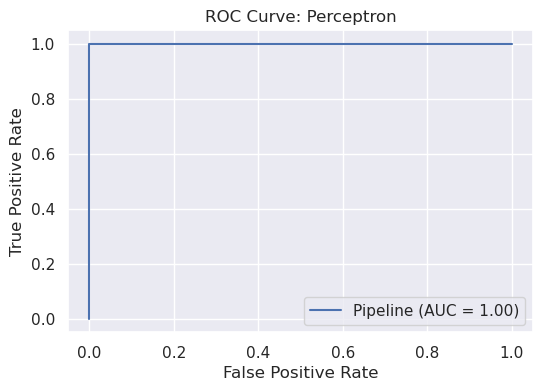

In [7]:
pca = PCA(n_components=1)

# Fit the model with the standardised data
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
perceptron(X_train_pca, X_test_pca, y_train, y_test)

We obtain an accuracy of $100\%$ when using only 1 PCA dimension, hence this is just as accurate as the original perceptron.

**What do your answers in (c) and (d) imply about the frequency spectrum of the two
signal classes?** <br>
xx

# Spam Email Classifier with PCA

In [8]:
df = pd.read_csv('spam_data.csv')
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Classification
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = df.iloc[:,1:3001]
Y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size = 0.8, test_size = 0.2,random_state = 10)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5172
Number of rows in the training set: 4137
Number of rows in the test set: 1035


Text(0.5, 1.0, 'Sum of the explained variance as a function of PCA')

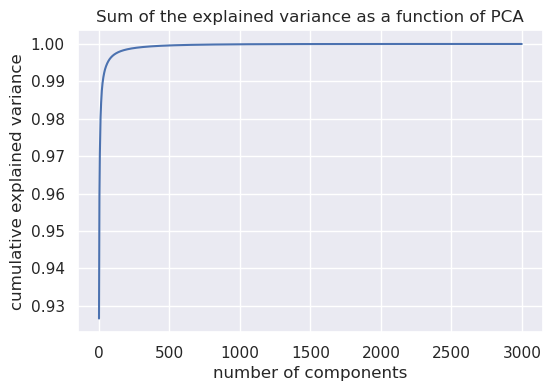

In [10]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 3000

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Sum of the explained variance as a function of PCA')

In [11]:
import time

def pca_component(n):
    pca = PCA(n_components=n)

    # Fit the model with the standardised data
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    return X_train_pca, X_test_pca


def logi_reg(X_train, X_test, y_train, y_test):
    pipe = make_pipeline(LogisticRegression(max_iter=1000))
    lr_clf_model = pipe.fit(X_train, y_train)  # apply scaling on training data
    acc = pipe.score(X_test, y_test)*100
    return acc

acc_list = []
time_list = []
for i in range(1,51):
    X_train_pca, X_test_pca = pca_component(i)
    start = time.time()
    acc = logi_reg(X_train_pca, X_test_pca, y_train, y_test)
    end = time.time()
    acc_list.append(acc)
    time_list.append((end-start)*1000)


Text(0.5, 1.0, 'Accuracy of the classifier as a function of PCA component')

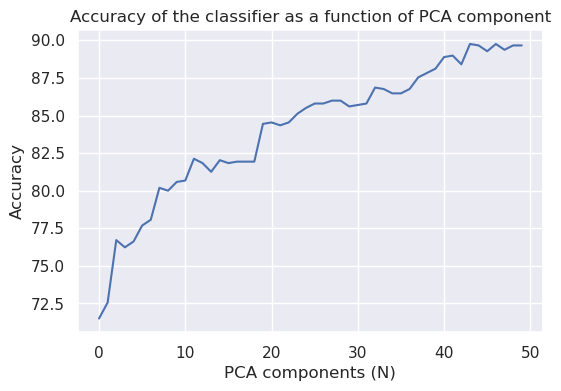

In [12]:
# acc_list
plt.plot(range(50), acc_list)
plt.xlabel('PCA components (N)')
plt.ylabel('Accuracy');
plt.title('Accuracy of the classifier as a function of PCA component')

Text(0.5, 1.0, 'Training time of the classifier as a function of PCA component')

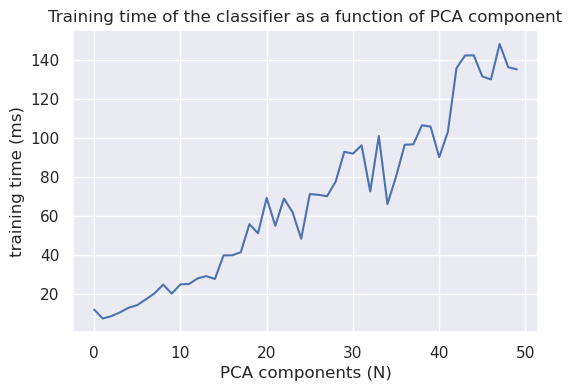

In [13]:
# acc_list
plt.plot(range(50), time_list)
plt.xlabel('PCA components (N)')
plt.ylabel('training time (ms)');
plt.title('Training time of the classifier as a function of PCA component')

**Based on your answers in (c) and (d), how many dimensions would you reduce the initial data to?** <br>
With accuracy of approximately 90% using $N=50$, this seems to be the best suitable dimension the data should be reduced to. However, this comes at a cost of taking the maximum training time to converge. So, not keeping in view time constraints, reducing the dimension to 50 is best option.

# Clustering Models Comparison

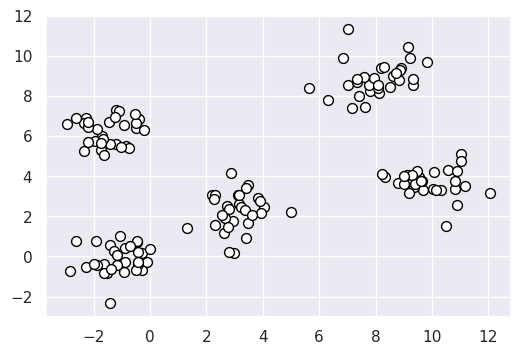

In [14]:
X = np.load('Cluster_data.py.npy') #.clu') #
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)

### K-means clustering

Clustering time: 0.008860 s


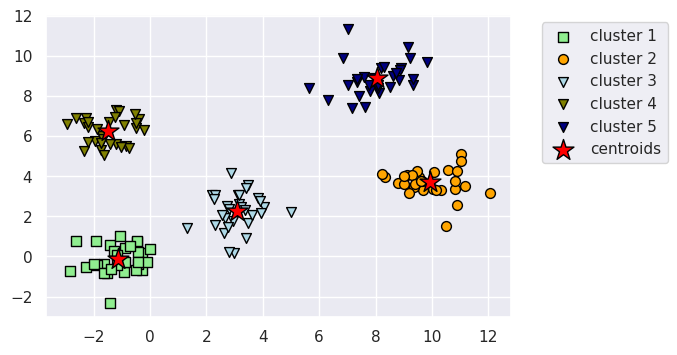

In [15]:
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
start = time.time()
y_km = km.fit_predict(X)
end = time.time()
print("Clustering time: {:2f} s".format(end-start))
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='olive',
    marker='v', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    X[y_km == 4, 0], X[y_km == 4, 1],
    s=50, c='navy',
    marker='v', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1))
plt.show()

### Gaussian Mixture Model

Clustering time: 0.004518 s


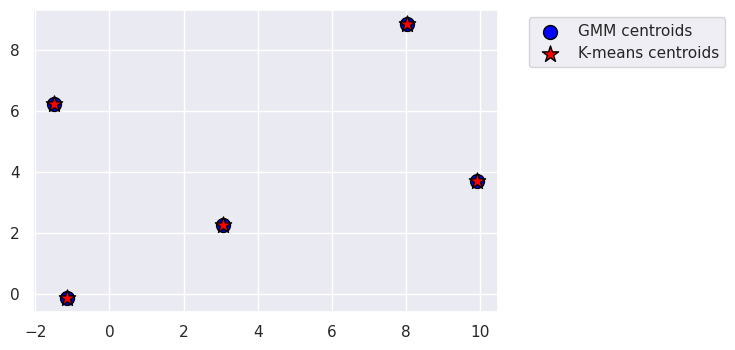

In [16]:
gm = GaussianMixture(n_components=5, 
                     max_iter=300, 
                     tol=1e-4,
                     )
start = time.time()
gm.fit(X)
end = time.time()
print("Clustering time: {:2f} s".format(end-start))

plt.scatter(
    gm.means_[:, 0], gm.means_[:, 1],
    s=100, marker='o',
    c='blue', edgecolor='black',
    label='GMM centroids'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=150, marker='*',
    c='red', edgecolor='black',
    label='K-means centroids'
)
plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1))
plt.show()

**How do these values compare to the centroids from K-means in part (a)?** <br>
The mean of each of each gaussian and that of K-means comes out to be apporixmately same. However, K means was found to converge faster.